<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.754190,27.436414,54.685939,1.892919e-06,127.876545,127.876543,1.595365e-06
1,0.0,1.0,46.117472,76.800236,82.464546,-2.985220e-08,215.382254,215.382254,3.690121e-08
2,0.0,2.0,75.179702,21.063180,40.695217,1.601672e-06,146.938101,146.938100,1.195132e-06
3,0.0,3.0,53.167871,56.211628,75.174876,1.382056e-08,194.554375,194.554375,-7.378620e-08
4,0.0,4.0,31.459343,56.851465,54.769872,9.340484e-08,153.080680,153.080680,-1.068639e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.171362,32.330253,93.831929,1.134356e-06,163.333546,163.333545,1.911691e-07
119996,999.0,116.0,70.870716,34.026158,48.795333,-8.006249e-08,163.692208,163.692208,-5.969911e-07
119997,999.0,117.0,60.579529,48.530202,59.830155,7.622699e-08,178.939885,178.939885,-3.194196e-07
119998,999.0,118.0,78.984322,74.547842,83.134692,7.460836e-09,246.666856,246.666856,-8.509991e-08


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    35.754190  27.436414  ...  127.876543  1.595365e-06
      1.0    46.117472  76.800236  ...  215.382254  3.690121e-08
      2.0    75.179702  21.063180  ...  146.938100  1.195132e-06
      3.0    53.167871  56.211628  ...  194.554375 -7.378620e-08
      4.0    31.459343  56.851465  ...  153.080680 -1.068639e-08
...                ...        ...  ...         ...           ...
999.0 115.0  27.171362  32.330253  ...  163.333545  1.911691e-07
      116.0  70.870716  34.026158  ...  163.692208 -5.969911e-07
      117.0  60.579529  48.530202  ...  178.939885 -3.194196e-07
      118.0  78.984322  74.547842  ...  246.666856 -8.509991e-08
      119.0  92.807532  64.463468  ...  227.088386 -4.874349e-08

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    35.754190  27.436414  ...  127.876543  1.595365e-06
      1.0    46.117472  76.800236  ...  215.382254  3.690121e-08
      2.0    75.179702  21.063180  ...  146.938100  1.195132e-06
      3.0    53.167871  56.211628  ...  194.554375 -7.378620e-08
      4.0    31.459343  56.851465  ...  153.080680 -1.068639e-08
...                ...        ...  ...         ...           ...
999.0 115.0  27.171362  32.330253  ...  163.333545  1.911691e-07
      116.0  70.870716  34.026158  ...  163.692208 -5.969911e-07
      117.0  60.579529  48.530202  ...  178.939885 -3.194196e-07
      118.0  78.984322  74.547842  ...  246.666856 -8.509991e-08
      119.0  92.807532  64.463468  ...  227.088386 -4.874349e-08

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.754190,27.436414,54.685939,1.892919e-06,127.876545,127.876543,1.595365e-06
1,0.0,1.0,46.117472,76.800236,82.464546,-2.985220e-08,215.382254,215.382254,3.690121e-08
2,0.0,2.0,75.179702,21.063180,40.695217,1.601672e-06,146.938101,146.938100,1.195132e-06
3,0.0,3.0,53.167871,56.211628,75.174876,1.382056e-08,194.554375,194.554375,-7.378620e-08
4,0.0,4.0,31.459343,56.851465,54.769872,9.340484e-08,153.080680,153.080680,-1.068639e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.171362,32.330253,93.831929,1.134356e-06,163.333546,163.333545,1.911691e-07
119996,999.0,116.0,70.870716,34.026158,48.795333,-8.006249e-08,163.692208,163.692208,-5.969911e-07
119997,999.0,117.0,60.579529,48.530202,59.830155,7.622699e-08,178.939885,178.939885,-3.194196e-07
119998,999.0,118.0,78.984322,74.547842,83.134692,7.460836e-09,246.666856,246.666856,-8.509991e-08


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    35.754190  27.436414  ...  127.876543  1.595365e-06
      1.0    46.117472  76.800236  ...  215.382254  3.690121e-08
      2.0    75.179702  21.063180  ...  146.938100  1.195132e-06
      3.0    53.167871  56.211628  ...  194.554375 -7.378620e-08
      4.0    31.459343  56.851465  ...  153.080680 -1.068639e-08
...                ...        ...  ...         ...           ...
999.0 115.0  27.171362  32.330253  ...  163.333545  1.911691e-07
      116.0  70.870716  34.026158  ...  163.692208 -5.969911e-07
      117.0  60.579529  48.530202  ...  178.939885 -3.194196e-07
      118.0  78.984322  74.547842  ...  246.666856 -8.509991e-08
      119.0  92.807532  64.463468  ...  227.088386 -4.874349e-08

[120000 rows x 7 columns]

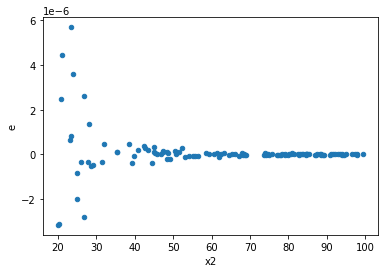

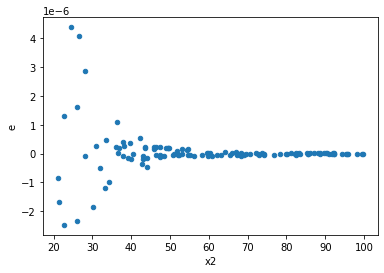

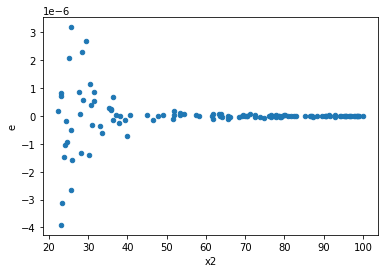

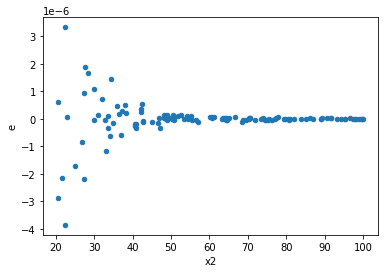

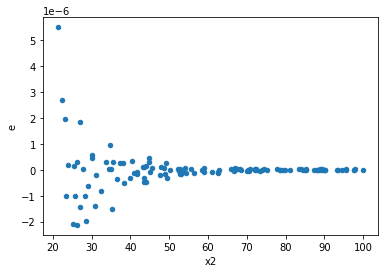

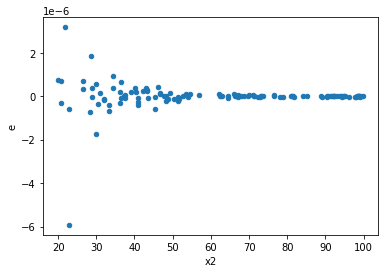

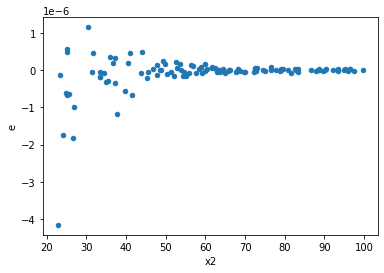

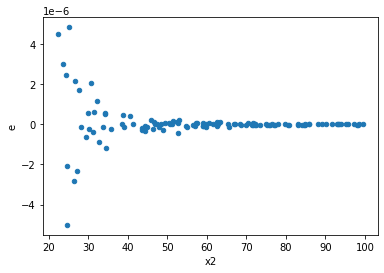

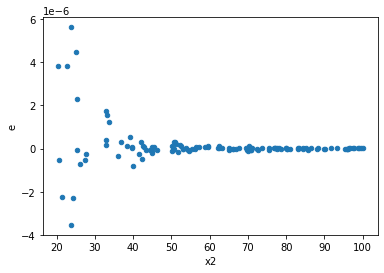

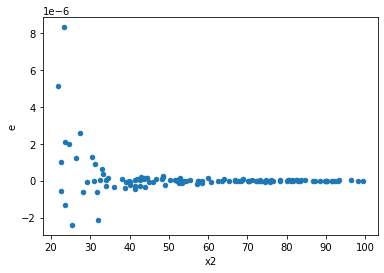

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,68.0,46.0,3.5566259138832655e-11,4.3090362887849644e-11,5.308396886392934e-13,9.57563619729992e-13,1.790989518009908,0.02838193979448045,0.9858090301027598,Reject005=0 : Heteroscedasticity
2.0,61.0,53.0,3.3205752705835153e-11,4.3688529492472567e-11,5.534292117639193e-13,8.401640287013955e-13,1.5142865441314985,0.11784332765522243,0.9410783361723888,Reject005=1 : Homoscedasticity
3.0,60.0,54.0,1.9571118700076656e-11,5.760061339873471e-11,3.3171387627248567e-13,1.086804026391221e-12,3.27015959255814,1.221522597893987e-05,0.9999938923870105,Reject005=0 : Heteroscedasticity
5.0,54.0,60.0,2.0557689652257455e-12,4.183088987315305e-11,3.878809368350463e-14,7.089981334432721e-13,18.313245078930166,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,64.0,50.0,3.424307112634047e-11,5.6427558917204454e-11,5.435408115292138e-13,1.1515828350449888e-12,2.109252267343013,0.005028259894303444,0.9974858700528483,Reject005=0 : Heteroscedasticity
8.0,50.0,64.0,1.657333913081381e-11,4.421669935928112e-11,3.3823141083293493e-13,7.0185237078224e-13,2.084329301523327,0.007809430680490559,0.9960952846597547,Reject005=0 : Heteroscedasticity
9.0,63.0,51.0,8.853881332699413e-11,1.173873500213933e-10,1.4280453762418408e-12,2.347747000427866e-12,1.6377890951853633,0.0628983081911274,0.9685508459044363,Reject005=1 : Homoscedasticity
10.0,61.0,53.0,2.7394188394034883e-11,8.283844642898128e-11,4.56569806567248e-13,1.5930470467111786e-12,3.4803864783178824,4.121309637783455e-06,0.9999979393451811,Reject005=0 : Heteroscedasticity
12.0,68.0,46.0,7.04850368754645e-14,7.509242049871458e-11,1.0520154757532015e-15,1.6687204555269907e-12,1574.8901007218951,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,59.0,6.034978760172791e-11,1.408583020052713e-11,1.1175886592912577e-12,2.428591413883988e-13,0.21757920256760577,3.1929936317394854e-08,Reject005=0 : Heteroscedasticity
1.0,68.0,46.0,3.5566259138832655e-11,4.3090362887849644e-11,5.308396886392934e-13,9.57563619729992e-13,1.790989518009908,0.02838193979448045,Reject005=0 : Heteroscedasticity
2.0,61.0,53.0,3.3205752705835153e-11,4.3688529492472567e-11,5.534292117639193e-13,8.401640287013955e-13,1.5142865441314985,0.11784332765522243,Reject005=1 : Homoscedasticity
3.0,60.0,54.0,1.9571118700076656e-11,5.760061339873471e-11,3.3171387627248567e-13,1.086804026391221e-12,3.27015959255814,1.221522597893987e-05,Reject005=0 : Heteroscedasticity
4.0,49.0,65.0,1.1319840273936967e-10,2.3188059177249218e-11,2.3583000570702013e-12,3.6231342464451904e-13,0.1544211649891666,1.0726765754242792e-11,Reject005=0 : Heteroscedasticity
5.0,54.0,60.0,2.0557689652257455e-12,4.183088987315305e-11,3.878809368350463e-14,7.089981334432721e-13,18.313245078930166,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,60.0,54.0,4.6845032946726396e-11,1.2822513597726201e-11,7.93983609266549e-13,2.4193421882502264e-13,0.3041354960089212,1.710573933817655e-05,Reject005=0 : Heteroscedasticity
7.0,64.0,50.0,3.424307112634047e-11,5.6427558917204454e-11,5.435408115292138e-13,1.1515828350449888e-12,2.109252267343013,0.005028259894303444,Reject005=0 : Heteroscedasticity
8.0,50.0,64.0,1.657333913081381e-11,4.421669935928112e-11,3.3823141083293493e-13,7.0185237078224e-13,2.084329301523327,0.007809430680490559,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    855
Reject005=1 : Homoscedasticity      145
Name: Result_test, dtype: int64